In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food41/food_test_c101_n1000_r64x64x3.h5
/kaggle/input/food41/food_c101_n10099_r32x32x3.h5
/kaggle/input/food41/food_c101_n1000_r384x384x3.h5
/kaggle/input/food41/food_test_c101_n1000_r128x128x3.h5
/kaggle/input/food41/food_test_c101_n1000_r32x32x3.h5
/kaggle/input/food41/food_test_c101_n1000_r32x32x1.h5
/kaggle/input/food41/food_test_c101_n1000_r128x128x1.h5
/kaggle/input/food41/food_c101_n10099_r64x64x1.h5
/kaggle/input/food41/food_c101_n10099_r64x64x3.h5
/kaggle/input/food41/food_test_c101_n1000_r64x64x1.h5
/kaggle/input/food41/food_c101_n10099_r32x32x1.h5
/kaggle/input/food41/meta/meta/test.txt
/kaggle/input/food41/meta/meta/train.json
/kaggle/input/food41/meta/meta/labels.txt
/kaggle/input/food41/meta/meta/test.json
/kaggle/input/food41/meta/meta/train.txt
/kaggle/input/food41/meta/meta/classes.txt
/kaggle/input/food41/images/macarons/2428554.jpg
/kaggle/input/food41/images/macarons/3842133.jpg
/kaggle/input/food41/images/macarons/1963752.jpg
/kaggle/input/food41/imag

In [1]:
from fastai import *
from fastai.vision.all import *
from fastai.callback.all import *

import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
path = Path('../input/food41')
path_meta = path /'meta/meta'
path_images = path/'images'

In [3]:
path_meta

Path('../input/food41/meta/meta')

In [4]:
def build_data_frame(path_name, file_name, img_format = 'jpg'):
    """
    build_data_frame input the path and file name, the function will return the dataframe with two columns:
    ['label'] : image label
    ['image_file'] : image file name with directory information
    input paramters:
    path_name : path 
    file_name : file name, string
    img_format : default format is jpg
    
    return dataframe
    """
    path_file = path_name/file_name
    file_df = pd.read_csv(path_file,delimiter='/', header=None, names=['label', 'image_file'])
    file_df['image_file'] = file_df['label'].astype(str) + '/' + file_df['image_file'].astype(str) + '.'+img_format
    
    return file_df

In [5]:
train_df = build_data_frame(path_meta, 'train.txt')
test_df = build_data_frame(path_meta, 'test.txt')

In [6]:
train_df.head()

label             image_file
0  apple_pie  apple_pie/1005649.jpg
1  apple_pie  apple_pie/1014775.jpg
2  apple_pie  apple_pie/1026328.jpg
3  apple_pie  apple_pie/1028787.jpg
4  apple_pie  apple_pie/1043283.jpg

In [7]:
test_df.head()

label             image_file
0  apple_pie  apple_pie/1011328.jpg
1  apple_pie   apple_pie/101251.jpg
2  apple_pie  apple_pie/1034399.jpg
3  apple_pie   apple_pie/103801.jpg
4  apple_pie  apple_pie/1038694.jpg

In [8]:
batch_size = 64

In [19]:
# Explore the dataset

train_data = ImageDataLoaders.from_df(df=train_df, path=path_images, fn_col=1, 
                                      label_col=0, valid_pct=0.2, bs=batch_size, item_tfms=Resize(224), device=torch.device('cuda'))

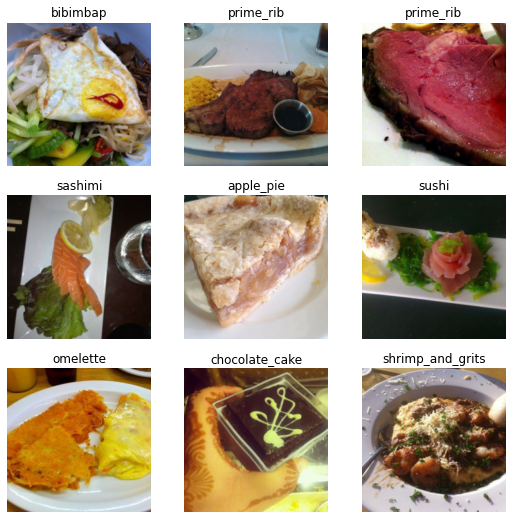

In [20]:
train_data.show_batch()

In [21]:
train_data.c

101

In [22]:
learn = vision_learner(train_data, resnet34, metrics=error_rate)

In [23]:
lr = 1e-2
learn.fit_one_cycle(8, slice(lr))

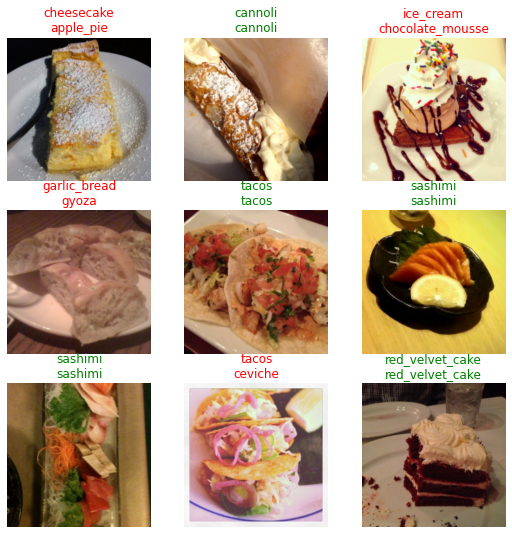

In [24]:
learn.show_results()

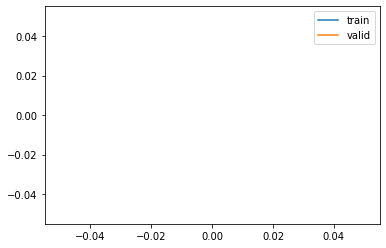

In [43]:
learn.recorder.plot_loss()

In [28]:
interp = Interpretation.from_learner(learn)

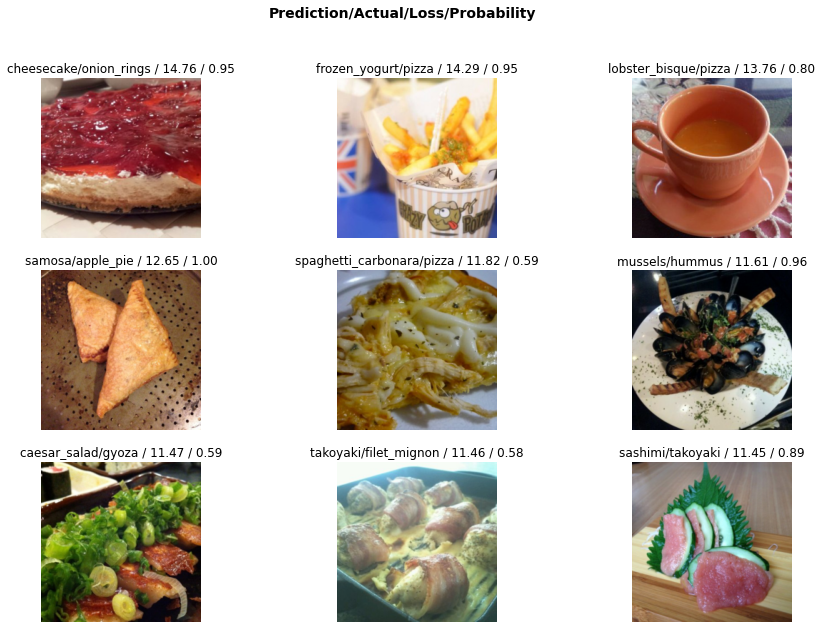

In [38]:
interp.plot_top_losses(9, figsize=(15,10))

# Approach 2

In [19]:
train_data_aug = ImageDataLoaders.from_df(df=train_df, path=path_images, fn_col=1, 
                                      label_col=0, valid_pct=0.2, bs=batch_size, item_tfms=Resize(460), 
                                    batch_tfms=aug_transforms(size=224), device=torch.device('cuda'))

In [20]:
top_5_accuracy = partial(top_k_accuracy, k=5)
learn_2 = vision_learner(train_data_aug, resnet50, metrics=[accuracy, top_5_accuracy, error_rate])
# learn_2.unfreeze()

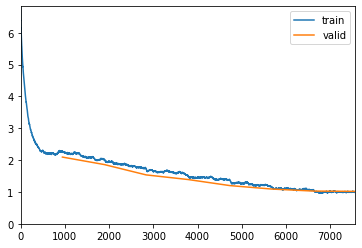

In [21]:
learn_2.fit_one_cycle(8, 1e-2, cbs=[ShowGraphCallback()])

In [17]:
# learn_2.fine_tune(2, 3e-3, cbs=[ShowGraphCallback()])

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f783da79dd0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f783da79dd0>  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    
if w.is_alive():Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1358, in __del__

  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
        assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/opt/con

KeyboardInterrupt: 

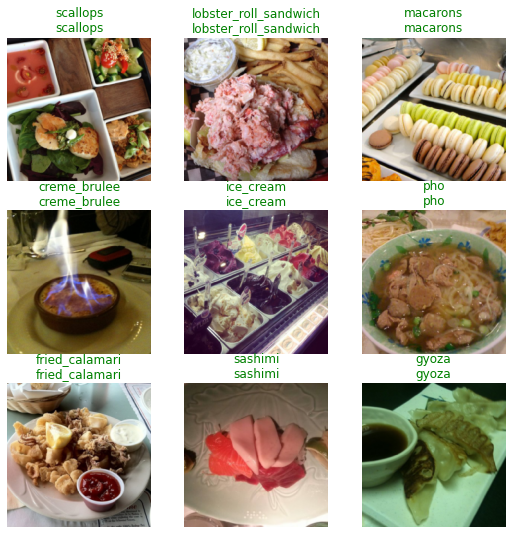

In [24]:
learn_2.show_results()

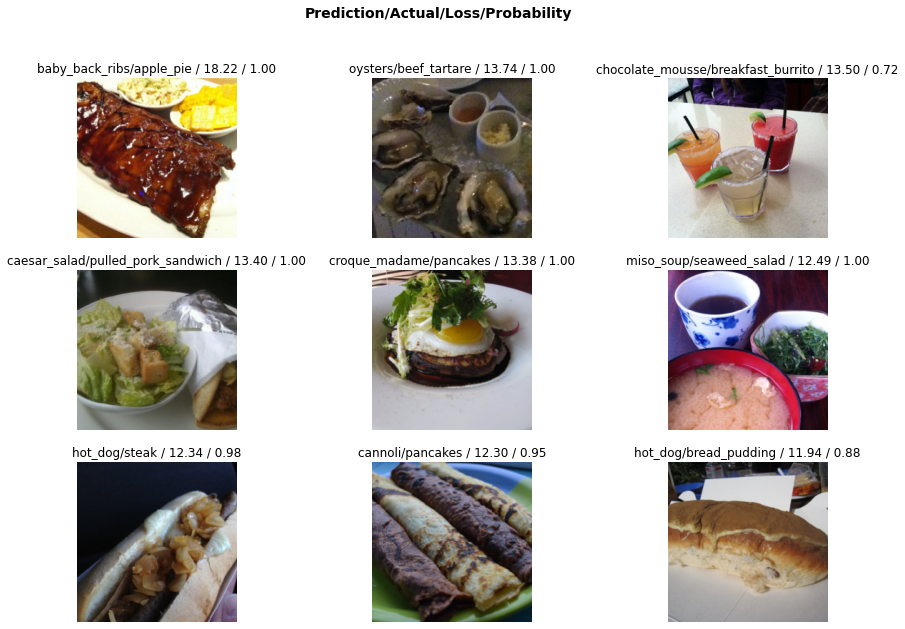

In [27]:
interp_2 = Interpretation.from_learner(learn_2)
interp_2.plot_top_losses(9, figsize=(15,10))

In [36]:
interp_2.top_losses(9)

(TensorBase([18.2179, 13.7441, 13.5005, 13.3994, 13.3755, 12.4856, 12.3439, 12.3013,
         11.9388]),
 TensorBase([ 1063,  1114, 14119,  3471,   395,   871,  7265,  4638,  4076]))